# 安裝

In [1]:
# !pip install tensorflow==1.3.0

# !pip install keras

In [2]:
# !pip install np_utils

In [3]:
from tensorflow import keras # 新版
import tensorflow.keras.utils as np_utils # 新版

# 開始

<font color="red">載入套件

In [1]:
import numpy as np
import pandas as pd

import keras # 舊版

In [15]:
# from keras.utils import np_utils # 舊版 deprecated - 已經廢棄不能用

<font color="red">載入Mnist手寫辨識資料

In [5]:
keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

<font color="red">Training的資料有60000筆而Testing的資料有10000筆都是28*28 pixel大小的手寫數字圖

In [6]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [7]:
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [8]:
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [9]:
import matplotlib.pyplot as plt
def plot_image(image):
  fig = plt.gcf()
  fig.set_size_inches(2, 2)
  plt.imshow(image, cmap='binary')
  plt.show()

In [87]:
# x_Train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<font color="red">畫出圖片長相以及Label

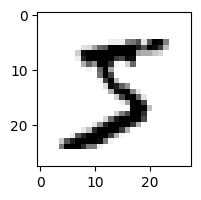

In [11]:
plot_image(x_Train[0])

In [12]:
y_Train[0]

5

In [13]:
# import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)  #  (nrows, ncols, index)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" + str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

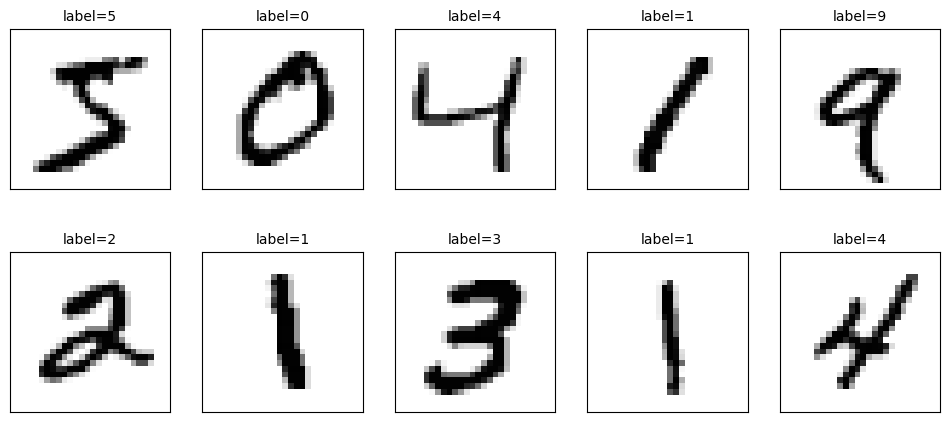

In [14]:
plot_images_labels_prediction(x_Train,y_Train,[],0,10)

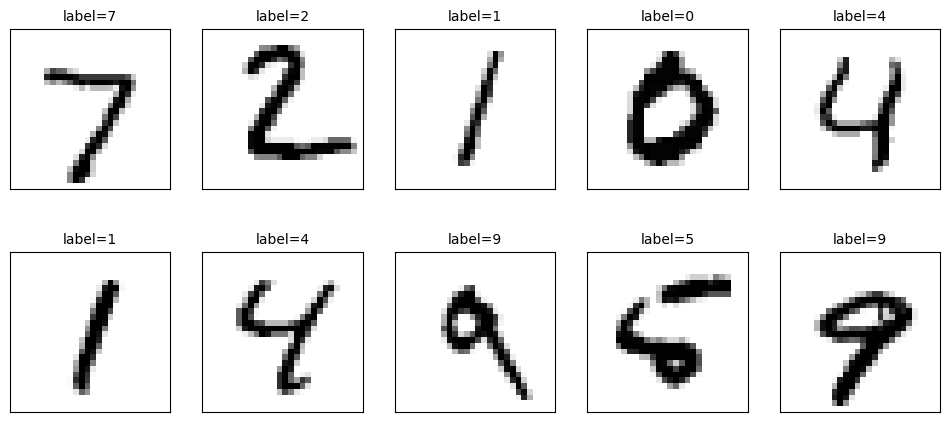

In [15]:
plot_images_labels_prediction(x_Test,y_Test,[],0,10)

In [16]:
x_Train.shape

(60000, 28, 28)

<font color="red">由於圖片通常是RGB三個顏色所組成的，假設圖片大小是28 * 28的彩色圖片，實際上的資料維度就是28 * 28 * 3。不過這邊數字的顏色都是單色因此我們轉成28 * 28 * 1的資料維度當作未來CNN Model的input

In [17]:
# 多加一個顏色的維度
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [18]:
x_Train4D.shape

(60000, 28, 28, 1)

<font color="red">灰階的圖片數值為0 ~ 255之間，我們將它縮放到0 ~ 1之間，並對類別資料做onehot-encoding處理



In [19]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

<font color="purple">当使用 categorical_crossentropy 损失时，你的目标值应该是分类格式 (即，如果你有 10 个类，每个样本的目标值应该是一个 10 维的向量，这个向量除了表示类别的那个索引为 1，其他均为 0)。 为了将 整数目标值 转换为 分类目标值，你可以使用 Keras 实用函数 to_categorical
<br>
參考 https://keras.io/zh/losses/

In [20]:
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [21]:
y_Train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
y_TrainOneHot # 用 rightmost bit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# 建立CNN模型

<font color="red">在這邊可以看到若使用Keras來建立CNN模型只要幾行Code就可以完成了，非常簡單！一開始先建立一個Sequential模型，接著一層一層加上去就可以了

<font color="purple">Sequential相關可參考 https://keras.io/zh/models/sequential/#sequential-api

<font color="purple">Conv2D可參考 https://blog.csdn.net/Zh_1999a/article/details/107526001

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [3]:
model = Sequential()

In [4]:
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
         kernel_size=(5,5),
         padding='same',
         input_shape=(28,28,1),
         activation='relu'))

In [5]:
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [6]:
model.add(Conv2D(filters=36,
         kernel_size=(5,5),
         padding='same',
         activation='relu'))

In [7]:
model.add(MaxPooling2D(pool_size=(2, 2)))

<font color="red">在層跟層之間通常會Drop掉一定比例的神經元來避免Overfit的狀況，要Drop掉多少比例沒有一個特定的值，通常是25%~50%之間



In [8]:
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))

In [9]:
# 平坦化
model.add(Flatten())

In [10]:
model.add(Dense(128, activation='relu'))

In [11]:
model.add(Dropout(0.5))

In [12]:
model.add(Dense(10,activation='softmax'))

In [47]:
# model.build(x_Train4D.shape)

In [13]:
# print(model.summary())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 36)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

# 訓練模型

<font color="red">開始訓練模型，這邊可以看到每一輪的迭代acc 以及 val_acc的準確度都慢慢再提高，從一開始的acc(training):83% val_acc(testing):96%的準確度，到第20輪時acc 以及val_acc 都變成99%的準確度了

In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

<font color="purple"><b>大約12分鐘

In [50]:
train_history=model.fit(x=x_Train4D_normalize,
             y=y_TrainOneHot,validation_split=0.2,
             epochs=20, batch_size=300,verbose=2)

Epoch 1/20
160/160 - 36s - loss: 0.4926 - accuracy: 0.8443 - val_loss: 0.0983 - val_accuracy: 0.9693 - 36s/epoch - 222ms/step
Epoch 2/20
160/160 - 34s - loss: 0.1427 - accuracy: 0.9589 - val_loss: 0.0673 - val_accuracy: 0.9792 - 34s/epoch - 215ms/step
Epoch 3/20
160/160 - 34s - loss: 0.1022 - accuracy: 0.9688 - val_loss: 0.0553 - val_accuracy: 0.9843 - 34s/epoch - 215ms/step
Epoch 4/20
160/160 - 39s - loss: 0.0855 - accuracy: 0.9745 - val_loss: 0.0497 - val_accuracy: 0.9854 - 39s/epoch - 242ms/step
Epoch 5/20
160/160 - 34s - loss: 0.0709 - accuracy: 0.9784 - val_loss: 0.0449 - val_accuracy: 0.9871 - 34s/epoch - 215ms/step
Epoch 6/20
160/160 - 34s - loss: 0.0607 - accuracy: 0.9817 - val_loss: 0.0423 - val_accuracy: 0.9881 - 34s/epoch - 211ms/step
Epoch 7/20
160/160 - 34s - loss: 0.0568 - accuracy: 0.9827 - val_loss: 0.0386 - val_accuracy: 0.9896 - 34s/epoch - 215ms/step
Epoch 8/20
160/160 - 35s - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.0364 - val_accuracy: 0.9898 - 35s/epoch - 222

In [61]:
# train_history.history
# 回傳dict，包含四個key：loss, accuracy, val_loss, val_accuracy

In [51]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

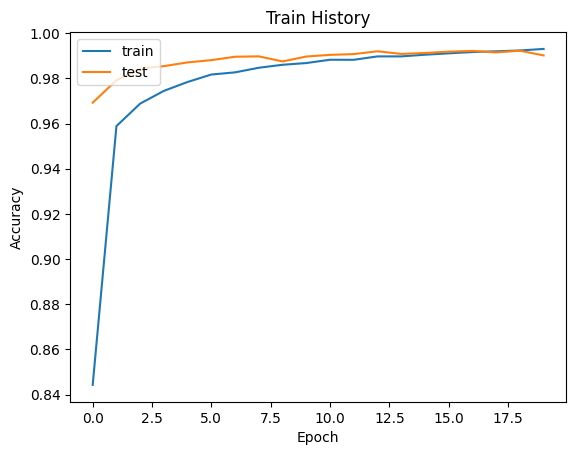

In [52]:
show_train_history('accuracy','val_accuracy')

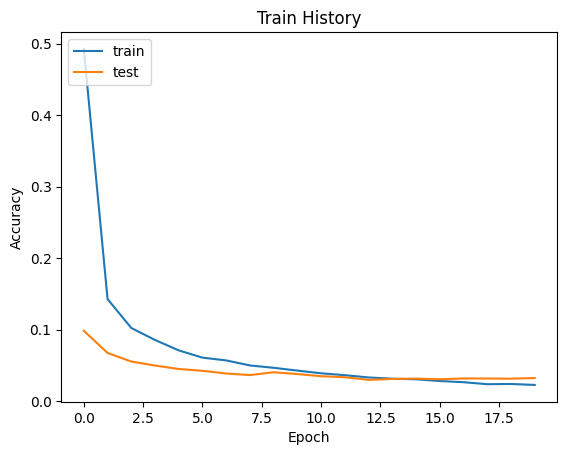

In [53]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [62]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot) # 返回誤差值和評估標準值。
scores[1]

313/313 [==============================] - 3s 8ms/step - loss: 0.0224 - accuracy: 0.9934


0.993399977684021

In [66]:
# scores

[0.02236454375088215, 0.993399977684021]

# 預測結果

In [73]:
# prediction=model.predict_classes(x_Test4D_normalize)  # (deprecated) AttributeError: 'Sequential' object has no attribute 'predict_classes'

predict_x=model.predict(x_Test4D_normalize)
prediction=np.argmax(predict_x,axis=1)

313/313 [==============================] - 3s 9ms/step


In [70]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [71]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
      ax=plt.subplot(5,5, 1+i)
      ax.imshow(images[idx], cmap='binary')

      ax.set_title("label=" + str(labels[idx])+
             ",predict=" + str(prediction[idx])
             ,fontsize=10)

      ax.set_xticks([]);ax.set_yticks([])
      idx+=1
      if idx >= len(images):
        break
    plt.show()

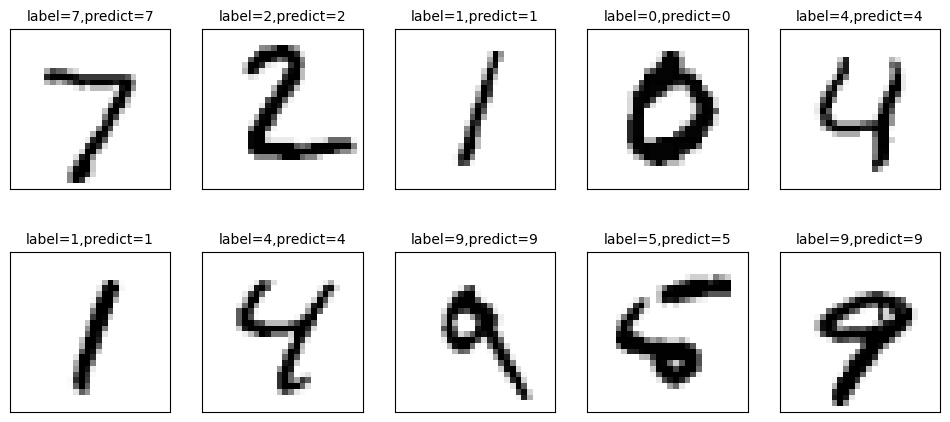

In [81]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [75]:
import pandas as pd
pd.crosstab(y_Test,prediction,
      rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,0,1134,0,0,0,0,1,0,0,0
2,1,1,1026,0,0,0,0,3,1,0
3,0,0,1,1006,0,1,0,0,2,0
4,0,0,0,0,977,0,1,0,1,3
5,1,0,0,9,0,879,1,0,0,2
6,2,2,0,0,1,1,952,0,0,0
7,0,4,1,0,0,0,0,1021,1,1
8,2,2,1,1,0,1,0,1,964,2


In [76]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [77]:
df[(df.label==5)&(df.predict==3)] # 應該有九筆

,label,predict
340,5,3
674,5,3
1393,5,3
2035,5,3
2597,5,3
2810,5,3
3157,5,3
4360,5,3
5937,5,3


In [78]:
df[(df.label==5)&(df.predict==3)].index

Int64Index([340, 674, 1393, 2035, 2597, 2810, 3157, 4360, 5937], dtype='int64')

In [82]:
[y_Test[i] for i in df[(df.label==5)&(df.predict==3)].index]

[5, 5, 5, 5, 5, 5, 5, 5, 5]

In [83]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

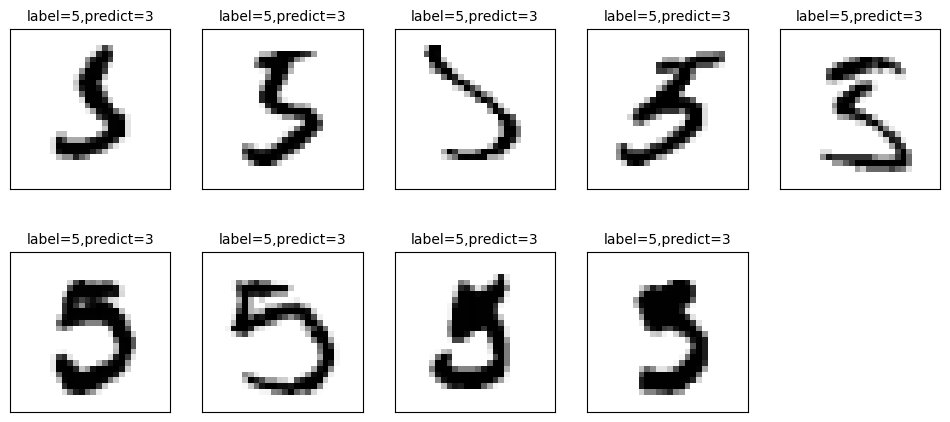

In [86]:
# plot_images_labels_prediction([x_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],[y_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],prediction,idx=0)

# x_Test[i] : index為i的image data
# y_Test[i] : index為i的image label(真實)
# prediction : 所有image data的預測值
plot_images_labels_prediction([x_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],
                [y_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],
                [prediction[i] for i in df[(df.label==5)&(df.predict==3)].index],
                idx=0)



# temp

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D, ReLU
# from keras.optimizers import RMSprop (錯誤)
from tensorflow.keras.optimizers import RMSprop

from matplotlib.pyplot import imshow
import numpy as np

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda

<function tensorflow.python.platform.test.is_built_with_cuda()>

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [4]:
y_train_c = keras.utils.np_utils.to_categorical(y_train, num_classes=10)
y_test_c = keras.utils.np_utils.to_categorical(y_test, num_classes=10)

AttributeError: ignored

In [5]:
model = Sequential()
model.add(Dense(20, activation=LeakyReLU(), input_shape=(784,)))
model.add(Dense(20, activation=LeakyReLU()))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 16330 (63.79 KB)
Trainable params: 16330 (63.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
